In [9]:
import numpy as np
from ncon import ncon
import sympy as smp
from matplotlib import pyplot as plt

In [12]:
T = []
for i in range(100):
    T.append(dict(np.load(f"./BH-cubicramp/BH-cubicramp_3_18_110_0.1/PEPS_{i:05d}.npz"))['J_exact'])

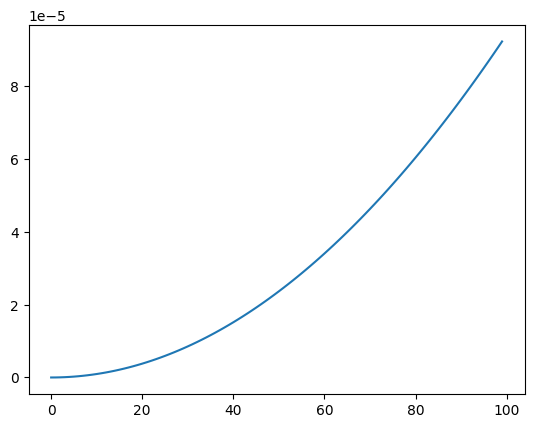

In [15]:
plt.plot(T)

In [14]:
k=60
dt = 0.1
tQ = 0.1 * (2 ** (k / 10))
Jc = 1 / 16.7
Jc_s, tQ_s, t_s, t0_s, dt_s = smp.symbols('J_c t_Q t t_0 dt', real=True)
ramp = Jc_s * (1 + t_s / tQ_s - smp.Rational(4, 27) * t_s ** 3 / tQ_s ** 3)
linear = Jc_s * (1 + t_s / tQ_s)
H = smp.Piecewise((0, t_s < 0), (1, t_s > 0), (1 / 2, True))
J_exact_s = ramp * (1 - H) + linear * H
J_average_s = smp.integrate(J_exact_s / dt_s, (t_s, t0_s, t0_s + dt_s))
J_exact = smp.lambdify(t_s, J_exact_s.evalf(subs={Jc_s: Jc, tQ_s: tQ}), 'numpy')
J_average = smp.lambdify(t0_s, J_average_s.evalf(subs={Jc_s: Jc, tQ_s: tQ, dt_s: dt}), 'numpy')
ts = np.linspace(-3/2*tQ,tQ,1000)

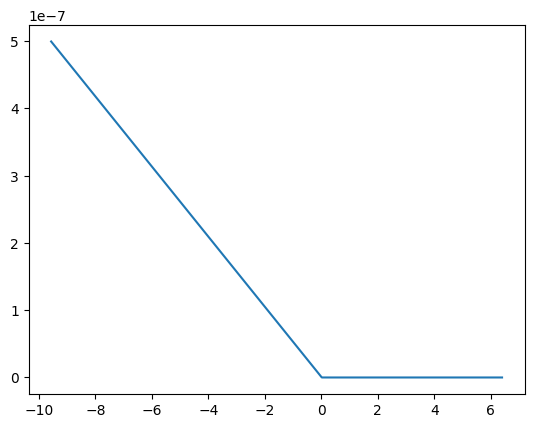

In [17]:
plt.plot(ts[2:],np.diff(J_exact(ts),2))

In [7]:
import numpy as np
np.char.add(np.random.choice(['I','q'],size=9,replace=True))

TypeError: _binary_op_dispatcher() missing 1 required positional argument: 'x2'

In [2]:
A, QA = np.random.randn(2,3,4,5,2)+1j*np.random.randn(2,3,4,5,2),np.random.randn(2,3,4,5,2)+1j*np.random.randn(2,3,4,5,2)
B, QB = np.random.randn(4,5,2,3,2)+1j*np.random.randn(4,5,2,3,2),np.random.randn(4,5,2,3,2)+1j*np.random.randn(4,5,2,3,2)

d = 2
r = 1
D0 = A.shape[0]
D1 = A.shape[1]
D2 = A.shape[2]
D3 = A.shape[3]
D01 = D0 * D1
D02 = D0 * D2
D03 = D0 * D3
D12 = D1 * D2
D13 = D1 * D3
D23 = D2 * D3
D023 = D0 * D2 * D3
D123 = D1 * D2 * D3
D013 = D0 * D1 * D3
D012 = D0 * D1 * D2
D0123 = D0 * D1 * D2 * D3
D0d = D0 * d
D1d = D1 * d
D2d = D2 * d
D3d = D3 * d
D01d = D0 * D1 * d
D02d = D0 * D2 * d
D03d = D0 * D3 * d
D12d = D1 * D2 * d
D13d = D1 * D3 * d
D23d = D2 * D3 * d
D023d = D0 * D2 * D3 * d
D123d = D1 * D2 * D3 * d
D013d = D0 * D1 * D3 * d
D012d = D0 * D1 * D2 * d
D0123d = D0 * D1 * D2 * D3 * d
D0r = D0 * r
D1r = D1 * r
D2r = D2 * r
D3r = D3 * r
D01r = D0 * D1 * r
D02r = D0 * D2 * r
D03r = D0 * D3 * r
D12r = D1 * D2 * r
D13r = D1 * D3 * r
D23r = D2 * D3 * r
D023r = D0 * D2 * D3 * r
D123r = D1 * D2 * D3 * r
D013r = D0 * D1 * D3 * r
D012r = D0 * D1 * D2 * r
D0123r = D0 * D1 * D2 * D3 * r
D1r = D1 * r

tensors = [B,B.conj(),QA,QA.conj(),QB,QB.conj(),A,A.conj(),B,B.conj(),A,A.conj(),B,B.conj(),A,A.conj()]
connects = [[27,2,29,28,1],[27,3,29,28,1],[17,-1,18,2,38],[16,-3,15,3,38],[22,6,19,-2,37],[21,5,20,-4,37],[36,35,34,6,4],[36,35,34,5,4],[25,10,17,26,7],[25,9,16,26,7],[23,24,22,10,8],[23,24,21,9,8],[18,14,31,30,11],[15,13,31,30,11],[19,33,32,14,12],[20,33,32,13,12]]
con_order = [27, 29, 28, 1, 36, 35, 34, 4, 5, 6, 37, 23, 24, 8, 31, 30, 11, 25, 26, 7, 10, 9, 22, 21, 33, 32, 12, 14, 13, 19, 20, 3, 2, 38, 16, 15, 17, 18]
g1 = ncon(tensors,connects,con_order)

UB = (B.swapaxes(0, 1).swapaxes(1, 2).reshape(D03, D12d) @ B.swapaxes(0, 1).swapaxes(1, 2).reshape(D03, D12d).conj().T).reshape(D3, D0, D3, D0).swapaxes(1, 2).reshape(D3 ** 2, D0 ** 2)
UA = (A.swapaxes(4, 3).swapaxes(3, 2).reshape(D01d, D23).T @ A.swapaxes(4, 3).swapaxes(3, 2).reshape(D01d, D23).T.conj().T).reshape(D2, D3, D2, D3).swapaxes(1, 2).reshape(D2 ** 2, D3 ** 2)

DB = (B.reshape(D23, D01d) @ B.reshape(D23, D01d).conj().T).reshape(D2, D3, D2, D3).swapaxes(1, 2).reshape(D2 ** 2, D3 ** 2)
DA = (A.swapaxes(3, 2).swapaxes(2, 1).reshape(D03, D12d) @ A.swapaxes(3, 2).swapaxes(2, 1).reshape(D03, D12d).conj().T).reshape(D0, D3, D0, D3).swapaxes(1, 2).reshape(D0 ** 2, D3 ** 2)

SB = np.trace(UB.T.reshape(D0, D0, D3 ** 2))
SA = np.trace(UA.reshape(D2, D2, D3 ** 2))

QAw = (ncon([QA, SB.reshape(D3, D3)], ([-1, -2, -3, 1, -5], [1, -4])).reshape(D012r, D3d) @ QA.reshape(D012r, D3d).conj().T).reshape(D0, D1r, D2, D0, D1r, D2).swapaxes(1, 3).swapaxes(2, 3).swapaxes(3, 4).reshape(D0 ** 2, D1r ** 2, D2 ** 2)
QBw = (ncon([QB, SA.reshape(D3, D3)], ([-1, 1, -3, -4, -5], [1, -2])).swapaxes(1, 2).swapaxes(2, 3).reshape(D012r, D3d) @ QB.swapaxes(1, 2).swapaxes(2, 3).reshape(D012r, D3d).conj().T).reshape(D2, D0, D1r, D2, D0, D1r).swapaxes(1, 3).swapaxes(2, 3).swapaxes(3, 4).reshape(D2 ** 2, D0 ** 2, D1r ** 2)

g2 = ncon([QAw, QBw, UA, UB, DA, DB], ([3, -1, 6], [5, 4, -2], [5, 2], [2, 3], [4, 1], [6, 1])).reshape(D1r, D1r, D1r, D1r).swapaxes(1, 2)

In [3]:
G = g1.reshape(D1r**2,D1r**2)
np.linalg.norm(G - G.conj().T)/np.linalg.norm(G)

1.0564830073199991e-16

In [4]:
G = g2.reshape(D1r**2,D1r**2)
np.linalg.norm(G - G.conj().T)/np.linalg.norm(G)

1.248257938605591e-16

In [5]:
g1 = g1 / np.linalg.norm(g1)
g2 = g2 / np.linalg.norm(g2)
np.linalg.norm(g1-g2)

3.758236857925753e-16

In [7]:
import numpy as np
sss = """#!/bin/bash
#PBS -N bh_ramp_DDD1_KKK
#PBS -l cput=9000:00:00
#PBS -q mp64
#PBS -o shiva_bh_ramp_DDD1_KKK.out
#PBS -e shiva_bh_ramp_DDD1_KKK.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-31 python -u createFullBH4_cubicramp.py DDD1 3 KKK 0.1 < /dev/null > bh_ramp_DDD1_KKK.out & 2> bh_ramp_DDD1_KKK.err &

wait"""

runcom = ""
for k in [90,100]:
    for D in [16]:
        prrr = sss.replace('DDD1',str(D)).replace('KKK',str(k))
        filename = "run_bh_cubic_DDD1_KKK.sh".replace('DDD1',str(D)).replace('KKK',str(k))
        runcom += "qsub " + filename + "\n"
        f = open(filename, "w")
        f.write(prrr)
        f.close()
        print(prrr)
f = open("runcom.txt", "w")
f.write(runcom)
f.close()
print(runcom)

#!/bin/bash
#PBS -N bh_ramp_16_90
#PBS -l cput=9000:00:00
#PBS -q mp64
#PBS -o shiva_bh_ramp_16_90.out
#PBS -e shiva_bh_ramp_16_90.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-31 python -u createFullBH4_cubicramp.py 16 3 90 0.1 < /dev/null > bh_ramp_16_90.out & 2> bh_ramp_16_90.err &

wait
#!/bin/bash
#PBS -N bh_ramp_16_100
#PBS -l cput=9000:00:00
#PBS -q mp64
#PBS -o shiva_bh_ramp_16_100.out
#PBS -e shiva_bh_ramp_16_100.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-31 python -u createFullBH4_cubicramp.py 16 3 100 0.1 < /dev/null > bh_ramp_16_100.out & 2> bh_ramp_16_100.err &

wait
qsub run_bh_cubic_16_90.sh
qsub run_bh_cubic_16_100.sh



In [1]:
import numpy as np
sss = """#!/bin/bash
#PBS -N bh_ramp_DDD1_KKK
#PBS -l cput=CPUT00:00:00
#PBS -q mpMPXX
#PBS -o shiva_bh_ramp_DDD1_KKK.out
#PBS -e shiva_bh_ramp_DDD1_KKK.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u createFullBH4_cubicramp.py DDD1 3 KKK 0.1 < /dev/null > bh_ramp_DDD1_KKK.out & 2> bh_ramp_DDD1_KKK.err &

wait"""

runcom = ""
for k in [90,100,110]:
    for D in [14]:
        if k % 30 ==  0:
            mpxx = "8"; cput = "15"
        if k % 30 == 10:
            mpxx = "16"; cput = "50"
        if k % 30 == 20:
            mpxx = "64"; cput = "90"
        prrr = sss.replace('MPXX',mpxx).replace('CPUT',cput).replace('DDD1',str(D)).replace('KKK',str(k))
        filename = "run_bh_cubic_DDD1_KKK.sh".replace('DDD1',str(D)).replace('KKK',str(k))
        runcom += "qsub " + filename + "\n"
        f = open(filename, "w")
        f.write(prrr)
        f.close()
        print(prrr)
f = open("runcom.txt", "w")
f.write(runcom)
f.close()
print(runcom)

#!/bin/bash
#PBS -N bh_ramp_14_90
#PBS -l cput=1500:00:00
#PBS -q mp8
#PBS -o shiva_bh_ramp_14_90.out
#PBS -e shiva_bh_ramp_14_90.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u createFullBH4_cubicramp.py 14 3 90 0.1 < /dev/null > bh_ramp_14_90.out & 2> bh_ramp_14_90.err &

wait
#!/bin/bash
#PBS -N bh_ramp_14_100
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_bh_ramp_14_100.out
#PBS -e shiva_bh_ramp_14_100.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u createFullBH4_cubicramp.py 14 3 100 0.1 < /dev/null > bh_ramp_14_100.out & 2> bh_ramp_14_100.err &

wait
#!/bin/bash
#PBS -N bh_ramp_14_110
#PBS -l cput=9000:00:00
#PBS -q mp64
#PBS -o shiva_bh_ramp_14_110.out
#PBS -e shiva_bh_ramp_14_110.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda she

In [5]:
import numpy as np
sss = """#!/bin/bash
#PBS -N around_PPP
#PBS -l cput=CPUT:00:00
#PBS -q mpMPXX
#PBS -o shiva_around_PPP.out
#PBS -e shiva_around_PPP.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u BHramp_CTM_arount_zero.py PPP < /dev/null > around_PPP.out & 2> around_PPP.err &

wait"""

runcom = ""
for pp in [0,1]:
    if pp%2==0:
        MPXX = 8
        CPUT = 1500
    else:
        MPXX = 16
        CPUT = 5000
    prrr = sss.replace('PPP', str(pp)).replace('MPXX',str(MPXX)).replace('CPUT',str(CPUT))
    filename = "run_around_PPP.sh".replace('PPP', str(pp))
    runcom += "qsub " + filename + "\n"
    f = open(filename, "w")
    f.write(prrr)
    f.close()
    print(prrr)
f = open("runcom.txt", "w")
f.write(runcom)
f.close()
print(runcom)

#!/bin/bash
#PBS -N around_0
#PBS -l cput=1500:00:00
#PBS -q mp8
#PBS -o shiva_around_0.out
#PBS -e shiva_around_0.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u BHramp_CTM_arount_zero.py 0 < /dev/null > around_0.out & 2> around_0.err &

wait
#!/bin/bash
#PBS -N around_1
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_around_1.out
#PBS -e shiva_around_1.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u BHramp_CTM_arount_zero.py 1 < /dev/null > around_1.out & 2> around_1.err &

wait
qsub run_around_0.sh
qsub run_around_1.sh



In [3]:
import numpy as np
sss = """#!/bin/bash
#PBS -N ising_DDD_KKK
#PBS -l cput=CPUT:00:00
#PBS -q mpMPXX
#PBS -o shiva_ising_DDD_KKK.out
#PBS -e shiva_ising_DDD_KKK.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u createISING_PEPS.py CHI DDD 1 HHH 0.005 700 10 < /dev/null > ising_DDD_KKK.out & 2> ising_DDD_KKK.err &

wait"""

runcom = ""
for D in [4,5,6,7,8,9]:
    for k in [0.1]:
        if D>=8:
            MPXX = 8
            CPUT = 1500
        else:
            MPXX = 16
            CPUT = 5000
        h_crit = 3.0444 / 4
        prrr = sss.replace('KKK',str(k)).replace('HHH',str(h_crit*k)).replace('DDD',str(D)).replace('CHI',str(4*D)).replace('MPXX',str(MPXX)).replace('CPUT',str(CPUT))
        filename = "run_ising_DDD_KKK.sh".replace('DDD', str(D)).replace('KKK',str(k))
        runcom += "qsub " + filename + "\n"
        f = open(filename, "w")
        f.write(prrr)
        f.close()
        print(prrr)
f = open("runcom.txt", "w")
f.write(runcom)
f.close()
print(runcom)

#!/bin/bash
#PBS -N ising_4_0.1
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_ising_4_0.1.out
#PBS -e shiva_ising_4_0.1.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u createISING_PEPS.py 16 4 1 0.07611000000000001 0.005 700 10 < /dev/null > ising_4_0.1.out & 2> ising_4_0.1.err &

wait
#!/bin/bash
#PBS -N ising_5_0.1
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_ising_5_0.1.out
#PBS -e shiva_ising_5_0.1.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-1000 python -u createISING_PEPS.py 20 5 1 0.07611000000000001 0.005 700 10 < /dev/null > ising_5_0.1.out & 2> ising_5_0.1.err &

wait
#!/bin/bash
#PBS -N ising_6_0.1
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_ising_6_0.1.out
#PBS -e shiva_ising_6_0.1.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/c

In [20]:

from matplotlib import pyplot as plt
import numpy as np
import IPython
import sympy as smp
Jc = 1/16.7
tQ = 1
dt=0.05
Jc_s, tQ_s, t_s, t0_s, dt_s = smp.symbols('J_c t_Q t t_0 dt',real=True)
ramp = Jc_s * (1 + t_s / tQ_s - smp.Rational(4,27) * t_s ** 3 / tQ_s ** 3)
linear = Jc_s *(1 + t_s / tQ_s)
H = smp.Heaviside
J_exact_s = ramp * H(-t_s) + linear * H(t_s)
J_average_s = smp.integrate(J_exact_s / dt_s, (t_s, t0_s, t0_s + dt_s))
J_exact = smp.lambdify(t_s,J_exact_s.evalf(subs={Jc_s:Jc,tQ_s:tQ}),'numpy')
J_average = smp.lambdify(t0_s,J_average_s.evalf(subs={Jc_s:Jc,tQ_s:tQ,dt_s:dt}),'numpy')

In [8]:
import numpy as np
for chimult in [2,3,4,5]:
    print(chimult,"\t\t",np.arange(chimult - 1, 1, -1))

2 		 []
3 		 [2]
4 		 [3 2]
5 		 [4 3 2]


In [27]:
1/167

In [25]:
np.linalg.pinv(np.random.randn(2,2))

array([[-1.01413666,  0.1915673 ],
       [ 0.40634391,  1.07139381]])

In [37]:
smp.limit(smp.simplify(smp.diff(J, (t, 1))), t, -3/2 * tQ)

In [19]:
from sympy import *

from sympy.abc import x

expr = sin(x)/x

print(J)

J_c*(-4*t**3/(27*t_Q**3) + t/t_Q + 1)


In [29]:
data = np.array(data)

for i in range(1, data.shape[0]):
    print(i, 1 - (data[i, 1]) / data[i - 1, 1])

1 0.43700203584172836
2 0.03403150027681523
3 0.002097219035438469
4 0.0011379014296624135
5 0.0006480955741240413
6 0.00036773281739965746
7 0.00020863401499393586
8 0.00011883028197912093
9 6.8288207526912e-05
10 3.988483395922504e-05
11 2.393125956612341e-05
12 1.4968234676726588e-05
13 9.92704363822483e-06
14 7.085024428921116e-06
15 5.475890332951039e-06
16 4.557867299914697e-06
17 4.027272548334793e-06
18 3.713912079317261e-06
19 3.522412549972209e-06
20 3.399329943754026e-06
21 3.314720028568807e-06
22 3.25180629312527e-06
23 3.2011878731141863e-06
24 3.1575967143204764e-06
25 3.1180822116505524e-06
26 3.0809900879447127e-06
27 3.045393982215039e-06
28 3.010774242473424e-06
29 2.9768386740069985e-06
30 2.9434234564140738e-06
31 2.910434853675703e-06
32 2.877821617786047e-06
33 2.8455547383954283e-06
34 2.813614533248021e-06
35 2.781991813805007e-06
36 2.7506803097487875e-06
37 2.719674381035375e-06
38 2.688971265873974e-06
39 2.6585685926061586e-06
40 2.628464697673749e-06
41 2.

In [35]:
import scipy, time
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output

n, d = 100, 30
t_svd, t_pinv = [], []

for iter in range(1000):
    if
iter % 100 == 0: print(iter)
A = np.random.randn(n, n) + 1j * np.random.randn(n, n)
B = np.random.randn(n, n) + 1j * np.random.randn(n, n)
I = np.diag([1] * (n - d) + [0] * d)
b = np.random.randn(n)
M = A @ I @ B

t = time.time()
for i in range(1):
    s = np.linalg.svd(M, compute_uv=False)
t_svd.append(time.time() - t)

t = time.time()
for i in range(1):
    s = np.linalg.pinv(M)
t_pinv.append(time.time() - t)

clear_output(True)
print(np.mean(t_svd), "\t", np.std(t_svd))
print(np.mean(t_pinv), "\t", np.std(t_pinv))

0.0038260402679443357 	 0.007917133018631997
0.00891042709350586 	 0.011578121836031784


In [131]:
import scipy, time
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output
from numpy.linalg import norm
from ncon import ncon

In [229]:
data = dict(np.load("data.npz"))
A = data['A']
B = data['B']
QA = data['QA']
QB = data['QB']
RA = data['RA']
RB = data['RB']
gA = data['gA']
JA = data['JA']
MB = data['MB']


def CalculateError(MA):
    W = MA @ MB.T - RA @ RB.T
    tensors = [B, B.conj(), A, A.conj(), B, B.conj(), B, B.conj(), A, A.conj(), A, A.conj(), QA, QA.conj(), QB,
               QB.conj(), W, W.conj()]
    connects = [[15, 14, 17, 16, 2], [15, 13, 18, 16, 2], [10, 9, 12, 14, 1], [10, 9, 11, 13, 1],
                [21, 19, 23, 22, 3], [21, 20, 23, 22, 3], [24, 26, 28, 29, 4], [25, 27, 28, 29, 4],
                [37, 31, 30, 26, 5], [38, 31, 30, 27, 5], [34, 33, 32, 36, 6], [34, 33, 32, 35, 6],
                [17, 40, 24, 19, 7], [18, 41, 25, 20, 7], [12, 36, 37, 39, 8], [11, 35, 38, 42, 8], [40, 39],
                [41, 42]]
    con_order = [15, 16, 2, 28, 29, 4, 34, 33, 32, 6, 21, 23, 22, 3, 20, 35, 42, 41, 10, 9, 1, 31, 30, 5, 14,
                 13,
                 18, 11, 26, 27, 39, 25, 38, 12, 36, 8, 37, 17, 19, 7, 24, 40]
    return ncon(tensors, connects, con_order)

In [230]:
gA = gA.reshape(900, 900)
U, s, Vh = np.linalg.svd(gA)
s = s / s[0]

In [231]:
error_pinv = []
for i in np.arange(1, 20, 1):
    print(i)
    MA = np.linalg.pinv(gA.reshape(900, 900).T, rcond=1 / 10 ** i) @ JA.reshape(900)
    error_pinv.append([i, CalculateError(MA.reshape(90, 10))])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [232]:
error_pinv

[[1, array(9.23313991e-05+1.61465656e-21j)],
 [2, array(5.50077142e-06+8.86737617e-22j)],
 [3, array(2.7235658e-07+1.15805286e-23j)],
 [4, array(3.17306425e-08-2.17134911e-24j)],
 [5, array(2.33321587e-09-3.87740912e-26j)],
 [6, array(2.19916568e-11-3.23117427e-27j)],
 [7, array(3.27718103e-12-1.57772181e-30j)],
 [8, array(1.0330209e-12+2.61901821e-28j)],
 [9, array(9.50841068e-13-4.65427934e-29j)],
 [10, array(9.49672874e-13+1.37261798e-28j)],
 [11, array(9.49572007e-13-7.4941786e-29j)],
 [12, array(9.49572007e-13-7.4941786e-29j)],
 [13, array(9.49572007e-13-7.4941786e-29j)],
 [14, array(9.49572007e-13-7.4941786e-29j)],
 [15, array(9.49572007e-13-7.4941786e-29j)],
 [16, array(9.49572007e-13-7.4941786e-29j)],
 [17, array(9.49572007e-13-7.4941786e-29j)],
 [18, array(9.49572007e-13-7.4941786e-29j)],
 [19, array(9.49572007e-13-7.4941786e-29j)]]

In [233]:
error_svd = []
U, s, Vh = np.linalg.svd(gA.reshape(900, 900).T)
sn = []

for i in np.arange(200, 902, 9):
    print(i)
    MA = (Vh.conj().T[:, :i] @ np.diag(1 / s[:i]) @ U.conj().T[:i, :] @ JA.reshape(900)).reshape(90, 10)
    sn.append(s[i] / s[0])
    error_svd.append([i, CalculateError(MA)])

200
209
218
227
236
245
254
263
272
281
290
299
308
317
326
335
344
353
362
371
380
389
398
407
416
425
434
443
452
461
470
479
488
497
506
515
524
533
542
551
560
569
578
587
596
605
614
623
632
641
650
659
668
677
686
695
704
713
722
731
740
749
758
767
776
785
794
803
812
821
830
839
848
857
866
875
884
893


/home/mazur/Dokumenty/pythonProject1/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


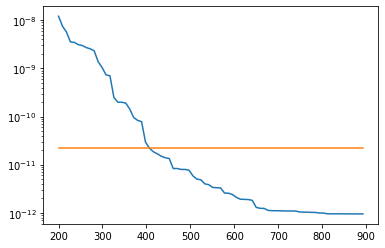

In [234]:
error_svd = np.array(error_svd).T
plt.yscale('log')
plt.plot(error_svd[0], np.abs(error_svd[1]))
plt.plot(error_svd[0], [2.19916568e-11] * len(error_svd[0]))
plt.show()

In [235]:
for i in range(900):
    print(i, "   ", np.abs(error_svd[1])[i])

0     1.2138114890215634e-08
1     7.519945277155677e-09
2     5.715142157327437e-09
3     3.5498349372725494e-09
4     3.4716051019780972e-09
5     3.1166992950540365e-09
6     2.990271633301376e-09
7     2.7102850742491548e-09
8     2.5556488056258125e-09
9     2.3332187638668806e-09
10     1.385648690032039e-09
11     1.050846430926913e-09
12     7.3574555808727e-10
13     7.048037577301681e-10
14     2.4919397298204205e-10
15     1.9848061415482978e-10
16     1.9847708726492103e-10
17     1.899739284335314e-10
18     1.4361641909864739e-10
19     9.563243381013181e-11
20     8.336279220199809e-11
21     7.84400613390614e-11
22     2.931926751672891e-11
23     2.1996475973147937e-11
24     1.8520617495076652e-11
25     1.682469397299302e-11
26     1.4977679822740098e-11
27     1.394013278897674e-11
28     1.345492507638958e-11
29     8.335740998271024e-12
30     8.335346838872192e-12
31     7.974963661133252e-12
32     7.974601088259003e-12
33     7.69786139996443e-12
34     5.84702

IndexError: index 78 is out of bounds for axis 0 with size 78

In [237]:
sn[22:25]

[1.2637876503826865e-06, 1.0623843990472412e-06, 7.036967349749969e-07]

In [164]:
for i in range(900):
    print(i, "   ", s[i] / s[0])

0     1.0
1     0.9999999999999998
2     0.9999999999999983
3     0.12819334731315182
4     0.12819334731315138
5     0.12819334731315116
6     0.12791782996561318
7     0.12791782996561282
8     0.1279178299656128
9     0.11227985159869808
10     0.11227985159869797
11     0.11227985159869773
12     0.11024510998081925
13     0.11024510998081916
14     0.1102451099808191
15     0.014393175776842656
16     0.014393175776842557
17     0.014393175776842524
18     0.014363140185298813
19     0.014363140185298332
20     0.014363140185297881
21     0.014133149776871487
22     0.014133149776871247
23     0.014133149776871069
24     0.014101609794102915
25     0.01410160979410285
26     0.014101609794102833
27     0.01171409867395944
28     0.011714098673959287
29     0.011714098673959282
30     0.009012643995967951
31     0.009012643995967929
32     0.009012643995967917
33     0.008827684198052885
34     0.008827684198052818
35     0.008827684198052816
36     0.006002070453134445
37     0.00

In [270]:
s / s[0]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.28193347e-01,
       1.28193347e-01, 1.28193347e-01, 1.27917830e-01, 1.27917830e-01,
       1.27917830e-01, 1.12279852e-01, 1.12279852e-01, 1.12279852e-01,
       1.10245110e-01, 1.10245110e-01, 1.10245110e-01, 1.43931758e-02,
       1.43931758e-02, 1.43931758e-02, 1.43631402e-02, 1.43631402e-02,
       1.43631402e-02, 1.41331498e-02, 1.41331498e-02, 1.41331498e-02,
       1.41016098e-02, 1.41016098e-02, 1.41016098e-02, 1.17140987e-02,
       1.17140987e-02, 1.17140987e-02, 9.01264400e-03, 9.01264400e-03,
       9.01264400e-03, 8.82768420e-03, 8.82768420e-03, 8.82768420e-03,
       6.00207045e-03, 6.00207045e-03, 6.00207045e-03, 5.99290892e-03,
       5.99290892e-03, 5.99290892e-03, 1.50165008e-03, 1.50165008e-03,
       1.50165008e-03, 1.49836986e-03, 1.49836986e-03, 1.49836986e-03,
       1.26486975e-03, 1.26486975e-03, 1.26486975e-03, 1.15528743e-03,
       1.15528743e-03, 1.15528743e-03, 1.15294703e-03, 1.15294703e-03,
      

In [269]:
np.where(s / s[0] > 6e-11, 0, 1)[np.argmax(np.diff(np.where(s / s[0] > 6e-11, 0, 1))) - len(s)]

0

In [238]:
np.floor(np.log10(np.abs(error_svd[1])))

array([ -8.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,
        -9., -10., -10., -10., -10., -10., -10., -10., -11., -11., -11.,
       -11., -11., -11., -11., -11., -11., -11., -12., -12., -12., -12.,
       -12., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -12., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -12., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -13., -13., -13., -13., -13., -13., -13., -13., -13., -13., -13.,
       -13.])

In [239]:
np.diff(np.floor(np.log10(np.abs(error_svd[1]))))

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [244]:
np.where(np.diff(np.floor(np.log10(np.abs(sn)))) == -1, np.abs(error_svd[1])[:-1], 0 * np.abs(error_svd[1])[:-1])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.33321876e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.19964760e-11,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.32401670e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [78]:
from ncon import ncon
import numpy as np
import time


def CalcOG(A, B, W, QA, QB):
    tensors = [B, B.conj(), A, A.conj(), B, B.conj(), B, B.conj(), A, A.conj(), A, A.conj(), QA, QA.conj(), QB,
               QB.conj(), W, W.conj()]
    connects = [[15, 14, 17, 16, 2], [15, 13, 18, 16, 2], [10, 9, 12, 14, 1], [10, 9, 11, 13, 1],
                [21, 19, 23, 22, 3], [21, 20, 23, 22, 3], [24, 26, 28, 29, 4], [25, 27, 28, 29, 4],
                [37, 31, 30, 26, 5], [38, 31, 30, 27, 5], [34, 33, 32, 36, 6], [34, 33, 32, 35, 6],
                [17, 40, 24, 19, 7], [18, 41, 25, 20, 7], [12, 36, 37, 39, 8], [11, 35, 38, 42, 8], [40, 39],
                [41, 42]]
    con_order = [15, 16, 2, 28, 29, 4, 34, 33, 32, 6, 21, 23, 22, 3, 20, 35, 42, 41, 10, 9, 1, 31, 30, 5, 14, 13, 18,
                 11, 26, 27, 39, 25, 38, 12, 36, 8, 37, 17, 19, 7, 24, 40]
    return ncon(tensors, connects, con_order)


def CalcTEST(A, B, W, QA, QB):
    D = A.shape[0]
    d = A.shape[-1]
    DDDd = D * D * D * d
    DDd = D * D * d

    tensors = [B.swapaxes(0, 1).swapaxes(1, 2).reshape(D, D, DDd),
               B.conj().swapaxes(0, 1).swapaxes(1, 2).reshape(D, D, DDd),
               A.swapaxes(4, 3).swapaxes(3, 2).reshape(DDd, D, D),
               A.conj().swapaxes(4, 3).swapaxes(3, 2).reshape(DDd, D, D), B.swapaxes(0, 1).reshape(D, DDDd),
               B.conj().swapaxes(0, 1).reshape(D, DDDd), B.reshape(D, D, DDd), B.conj().reshape(D, D, DDd),
               A.swapaxes(4, 3).reshape(D, DDd, D), A.conj().swapaxes(4, 3).reshape(D, DDd, D),
               A.swapaxes(4, 3).reshape(DDDd, D), A.conj().swapaxes(4, 3).reshape(DDDd, D),
               QA, QA.conj(), QB, QB.conj(), W, W.conj()]
    connects = [[14, 17, 2], [13, 18, 2], [3, 12, 14], [3, 11, 13], [19, 1], [20, 1], [24, 26, 4], [25, 27, 4],
                [37, 5, 26], [38, 5, 27], [6, 36], [6, 35], [17, 40, 24, 19, 7], [18, 41, 25, 20, 7],
                [12, 36, 37, 39, 8], [11, 35, 38, 42, 8], [40, 39], [41, 42]]
    con_order = [41, 39, 6, 1, 2, 4, 3, 5, 14, 13, 26, 27, 35, 20, 42, 18, 11, 25, 38, 12, 36, 8, 37, 17, 19, 7, 24, 40]
    return ncon(tensors, connects, con_order)

In [79]:
d, D, Dr = 3, 7, 9*7
tog,ttest=[],[]
for i in range(100):
    A = np.random.randn(D, D, D, D, d)
    B = np.random.randn(D, D, D, D, d)
    W = np.random.randn(Dr, Dr)
    QA = np.random.randn(D, Dr, D, D, d)
    QB = np.random.randn(D, D, D, Dr, d)

    t0 = time.time()
    for i in range(1):
        asdadssd = (CalcOG(A, B, W, QA, QB))
    tog.append(time.time() - t0)

    t0 = time.time()
    for i in range(1):
        asdadssd = (CalcTEST(A, B, W, QA, QB))
    ttest.append(time.time() - t0)
print(np.mean(tog),np.std(tog))
print(np.mean(ttest),np.std(ttest))

0.05788975238800049 0.021929338660524735
0.04928636312484741 0.026428994181634902


In [81]:
d, D, Dr = 3, 7, 9*7
tog,ttest=[],[]
for i in range(100):
    A = np.random.randn(D, D, D, D, d)
    B = np.random.randn(D, D, D, D, d)
    W = np.random.randn(Dr, Dr)
    QA = np.random.randn(D, Dr, D, D, d)
    QB = np.random.randn(D, D, D, Dr, d)
    a1,a2 = (CalcOG(A, B, W, QA, QB)),(CalcTEST(A, B, W, QA, QB))
    a = np.sqrt(a1**2+a2**2)
    print(a1/a-a2/a)

1.1102230246251565e-16
3.3306690738754696e-16
1.1102230246251565e-16
-1.1102230246251565e-16
1.1102230246251565e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
3.3306690738754696e-16
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
-1.1102230246251565e-16
1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0
0.0
-2.220446049250313e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
-1.1102230246251565e-16
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
2.220446049250313e-16
3.3306690738754696e-16
-1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
0.0
-5.551115123125783e-16
2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
1.1102230246251565e-16
-2.220446049250313e-16
0.0
2.220446049250313e-16
1.11022302462515

In [14]:
def sgn(s): return "++" if s>0 else "--";
def code(ss):
    s1 = ss[0]
    s2 = ss[1]
    s3 = ss[2]
    s4 = ss[3]
    s5 = ss[4]
    return """//Jakub Mazur
#include<iostream>
#include<string>
#include<cmath>
using namespace std;

int main(){
    int N; cin >> N;
    int L;
    int S;
    int buff;
    float fl;
    string ocena;
    for (int i = 0; i < N; ++i) {
        cin >> L;
        S = 0;
        for (int j = 0; j < 6; ++j) {
            cin >> buff;
            S += buff;
        }
//        cout << S << "  \t";
        ocena = "";

        if (S == 50*6) S""" + sgn(s1) + """;
        if (S == 60*6) S""" + sgn(s2) + """;
        if (S == 70*6) S""" + sgn(s3) + """;
        if (S == 80*6) S""" + sgn(s4) + """;
        if (S == 90*6) S""" + sgn(s5) + """;

        if (S >= 0*6 and S < 50*6)
            ocena = "ndst";
        else if (S > 50*6 and S < 60*6)
            ocena = "dst";
        else if (S > 60*6 and S < 70*6)
            ocena = "dts+";
        else if (S > 70*6 and S < 80*6)
            ocena = "db";
        else if (S > 80*6 and S < 90*6)
            ocena = "db+";
        else if (S > 90*6 and S <= 100*6)
            ocena = "bdb";
        else if (S<0*6 or S>100*6)
            cout << 1/0;
        cout << L << ": " << ocena;
        if (i+1 != N or false) cout << endl;
    }
}
"""

In [15]:
import numpy as np
import pipe
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    #m = n / arrays[0].size
    m = int(n / arrays[0].size)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
        #for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out

In [16]:
print(cartesian(([1,-1],[1,-1],[1,-1],[1,-1],[1,-1])))

[[ 1  1  1  1  1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1  1  1]
 [ 1  1 -1  1 -1]
 [ 1  1 -1 -1  1]
 [ 1  1 -1 -1 -1]
 [ 1 -1  1  1  1]
 [ 1 -1  1  1 -1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1 -1 -1]
 [ 1 -1 -1  1  1]
 [ 1 -1 -1  1 -1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1]
 [-1  1  1  1  1]
 [-1  1  1  1 -1]
 [-1  1  1 -1  1]
 [-1  1  1 -1 -1]
 [-1  1 -1  1  1]
 [-1  1 -1  1 -1]
 [-1  1 -1 -1  1]
 [-1  1 -1 -1 -1]
 [-1 -1  1  1  1]
 [-1 -1  1  1 -1]
 [-1 -1  1 -1  1]
 [-1 -1  1 -1 -1]
 [-1 -1 -1  1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1]]


In [18]:
codes = list(map(code,cartesian(([1,-1],[1,-1],[1,-1],[1,-1],[1,-1]))))

In [23]:
for n,code in enumerate(codes):
    name = f'code_{n:03d}.cpp'
    f = open(name, 'w')
    f.write(code)
    f.close()